## Walmart Sales 데이터 분석

1. User_ID: User ID
2. Product_ID: Product ID
3. Gender: 성별
4. Age: 연령구간
5. Occupation: 직업(카테고리로 되어 있음)
6. City_Category: 도시 카테고리 (A,B,C)
7. StayInCurrentCityYears: 도시 산 년수
8. Marital_Status: 결혼 여부
9. ProductCategory: 제품 카테고리(카테고리화 되어 있음)
10. Purchase: 구매 수량


In [2]:
import pandas as pd
df = pd.read_csv("data/walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### 문제 설정
- 결혼여부에 따른 소비 패턴을 분석해보자.

### 데이터 수집 및 가공

In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [10]:
# 비어있는 값은 없음을 확인했다.

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### 데이터 관찰
- 각 컬럼별로 살펴보자.

In [13]:
# user id 몇명의 데이터인가
df['User_ID'].nunique()

5891

In [15]:
df['Product_ID'].nunique()

3631

In [20]:
# 1인이 평균적으로 구매한 물품의 갯수는
# 평균적으로 93개 종류의 물품을 구매했다.

df.groupby('User_ID', as_index=False)['Product_ID'].count()['Product_ID'].mean()

93.37429977932439

In [27]:
# count라고 하는 dummy 변수를 만들어준다. 

df['counts'] = 1
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,counts
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,1
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,1
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,1
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,1


In [38]:
# 그렇다면 결혼여부에 따라 종류 개수의 차이가 있을까?

marital = df[['User_ID','Marital_Status', 'counts']].groupby(['User_ID', 'Marital_Status'], as_index=False).agg({"counts" : "sum"})
marital

,User_ID,Marital_Status,counts
0,1000001,0,35
1,1000002,0,77
2,1000003,0,29
3,1000004,1,14
4,1000005,1,106
...,...,...,...
5886,1006036,1,514
5887,1006037,0,122
5888,1006038,0,12
5889,1006039,1,74


In [41]:
# 결혼을 안한 경우 종류가 조금 더 많아 보인다.

marital.groupby('Marital_Status', as_index=False)['counts'].mean()

,Marital_Status,counts
0,0,95.033948
1,1,91.082053


In [46]:
# 실제 구매수량은 차이가 있을까?

purchase = df.groupby('User_ID', as_index=False).agg({"Purchase" : 'sum'})
purchase.head()

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001


In [52]:
# 이 정보를 결혼 여부와 묶어주자. 
# 이떄 merge를 이용한다.

# 먼저 중복된 정보 지워준다.
marital = df[['User_ID', 'Marital_Status']].drop_duplicates()
marital.reset_index(drop=True, inplace=True)
marital.head()

,User_ID,Marital_Status
0,1000001,0
1,1000002,0
2,1000003,0
3,1000004,1
4,1000005,1


In [57]:
purchase = purchase.merge(marital, on='User_ID')
purchase

,User_ID,Purchase,Marital_Status
0,1000001,334093,0
1,1000002,810472,0
2,1000003,341635,0
3,1000004,206468,1
4,1000005,821001,1
...,...,...,...
5886,1006036,4116058,1
5887,1006037,1119538,0
5888,1006038,90034,0
5889,1006039,590319,1


In [61]:
# 이제 groupby를 해서 총 수량의 mean 값이 다른지 보자.
# 여기서 볼 수 있는 것은 여전히 결혼을 안한 경우 구매수량이 더 적었다. 

purchase.groupby("Marital_Status", as_index=False)['Purchase'].mean()

,Marital_Status,Purchase
0,0,880575.781972
1,1,843526.796686


결혼 여부에 따른 소비물품의 차이가 있는지 살펴보자.

각 그룹별로 어떤 물품을 많이 소비했는지 보자

In [74]:
product = df[['Marital_Status','Product_Category','Purchase']]
product.head()

,Marital_Status,Product_Category,Purchase
0,0,3,8370
1,0,1,15200
2,0,12,1422
3,0,12,1057
4,0,8,7969


In [79]:
product = product.groupby(['Marital_Status','Product_Category'], as_index=False)['Purchase'].count()
product.head()

,Marital_Status,Product_Category,Purchase
0,0,1,84375
1,0,2,14138
2,0,3,12359
3,0,4,7177
4,0,5,89656


In [90]:
# assign을 이용해서 구매품목의 비율이 같은지/다른지를 비교해보자.

import numpy as np
product.pivot_table(index='Product_Category', columns='Marital_Status', aggfunc=np.sum, margins=True).assign(
    **{'% of unmarried' : lambda x : x['Purchase',0] / x.iloc[:-1]['Purchase',0].sum() * 100,
       '% of married' : lambda x : x['Purchase', 1] / x.iloc[-1]['Purchase',1].sum() * 100}
)

/tmp/ipykernel_29236/2703514505.py:2: FutureWarning: The provided callable <function sum at 0x785bad16f6a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product.pivot_table(index='Product_Category', columns='Marital_Status', aggfunc=np.sum, margins=True).assign(
/tmp/ipykernel_29236/2703514505.py:2: FutureWarning: The provided callable <function sum at 0x785bad16f6a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product.pivot_table(index='Product_Category', columns='Marital_Status', aggfunc=np.sum, margins=True).assign(
/tmp/ipykernel_29236/2703514505.py:2: FutureWarning: The provided callable <function sum at 0x785bad16f6a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used

Purchase                 % of unmarried % of married
Marital_Status          0       1     All                            
Product_Category                                                     
1                   84375   56003  140378      25.983044    24.852998
2                   14138    9726   23864       4.353757     4.316202
3                   12359    7854   20213       3.805919     3.485446
4                    7177    4576   11753       2.210137     2.030736
5                   89656   61277  150933      27.609314    27.193492
6                   12139    8327   20466       3.738171     3.695354
7                    2040    1681    3721       0.628212     0.745994
8                   65411   48514  113925      20.143134    21.529531
9                     247     163     410       0.076063     0.072336
10                   2778    2347    5125       0.855477     1.041551
11                  14668    9619   24287       4.516969     4.268718
12                   2034    1913    3947       0.626365     0.848951
13                   3162    2387    5549       0.973729     1.059302
14                    846     677    1523       0.260523     0.300439
15                   3623    2667    6290       1.115693     1.183561
16                   5713    4115    9828       1.759302     1.826154
17                    298     280     578       0.091768     0.124258
18                   1641    1484    3125       0.505341     0.658569
19                    946     657    1603       0.291318     0.291563
20                   1480    1070    2550       0.455762     0.474844
All                324731  225337  550068     100.000000   100.000000

단순히 결혼여부에 따라 구매 상품의 차이가 있는 것은 아닌 것 같다.
그러므로 더 세부적으로 그룹을 나눌 필요가 있어 보인다.
이렇기 때문에 domain 지식이 중요하다.

In [95]:
# 먼저 성별에 따라 결혼여부로 그루핑을 해보자.
# 미혼 남성들의 소비가 굉장히 많음을 볼 수 있다.

df.groupby(['Marital_Status','Gender'], as_index=False)['counts'].sum()

,Marital_Status,Gender,counts
0,0,F,78821
1,0,M,245910
2,1,F,56988
3,1,M,168349


In [100]:
# 연령군 + 결혼으로 또 묶어보자.
# 데이터를 보면, 0-17세 사이에서는 기혼자가 없다. 
# 또한, 구매량이 가장 많은 나이대가 혼인층에서는 26-35, 36-45살임을 볼 수 있다.
# 미혼층에서는 18-25,26-35살이 구매량이 높다.

df.groupby(['Marital_Status','Age'],as_index=False)['counts'].sum().pivot_table(index="Age", columns='Marital_Status')

counts         
Marital_Status         0        1
Age                              
0-17             15102.0      NaN
18-25            78544.0  21116.0
26-35           133296.0  86291.0
36-45            66377.0  43636.0
46-50            12690.0  33011.0
51-55            10839.0  27662.0
55+               7883.0  13621.0

### 가설 설정
- 기혼 26-45세의 사람들과 미혼 18-35세의 사람들의 구매 패턴이 다를 것이고,
- 그 다른 품목들을 비교해서 마케팅 전략을 수립한다면 더 높은 매출을 창출할 수 있을 것이다.

### 데이터 분석 및 모델링
- 각 그룹별로 데이터를 정제한다.

In [103]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [107]:
# 26-45인 기혼자

married = df[(df.Marital_Status == 1) & (df.Age.isin(['26-35','36-45']))].copy()
married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,counts
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,1
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254,1
11,1000005,P00014542,M,26-35,20,A,1,1,8,3957,1
12,1000005,P00031342,M,26-35,20,A,1,1,8,6073,1
13,1000005,P00145042,M,26-35,20,A,1,1,1,15665,1


In [136]:
married = married.groupby(['User_ID','Product_Category'],as_index=False)['Purchase'].sum()
married.head()

,User_ID,Product_Category,Purchase
0,1000005,1,194401
1,1000005,2,26132
2,1000005,3,10851
3,1000005,4,7746
4,1000005,5,116424


In [137]:
# 18-25, 26-35인 미혼자

unmarried = df[(df.Marital_Status == 0) & (df.Age.isin(['18-25', '26-35']))].copy()

unmarried = unmarried.groupby(['User_ID','Product_Category'],as_index=False)['Purchase'].sum()
unmarried.head()

,User_ID,Product_Category,Purchase
0,1000003,1,228578
1,1000003,2,29054
2,1000003,3,10906
3,1000003,5,63426
4,1000003,8,5817


먼저 기혼자 그룹부터 분석해보자.

In [138]:
married['Product_Category'].value_counts(normalize=True).sort_index().reset_index()

,Product_Category,proportion
0,1,0.098108
1,2,0.074828
2,3,0.068810
3,4,0.060021
4,5,0.099137
5,6,0.073086
6,7,0.027714
7,8,0.097632
8,9,0.008077
9,10,0.042204


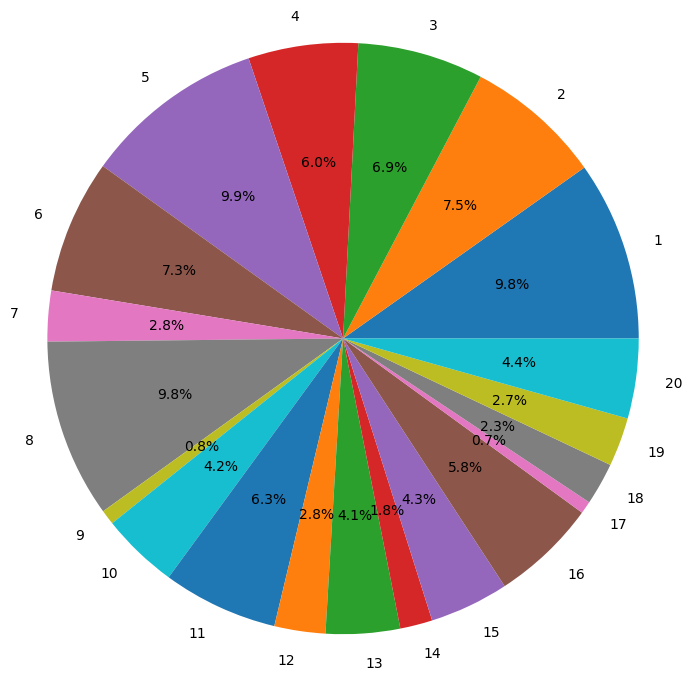

In [139]:
# 보기 어렵기 때문에 matplotlib이라고 하는 시각화 라이브러리로 한번에 시각화 해본다.
import matplotlib.pyplot as plt

label = married['Product_Category'].value_counts(normalize=True).sort_index().reset_index()['Product_Category']
products_married = married['Product_Category'].value_counts(normalize=True).sort_index()
plt.pie(products_married,labels =label, autopct='%1.1f%%', radius=2);

보면 1,5,8 카테고리의 소비가 높음을 볼 수 있다.

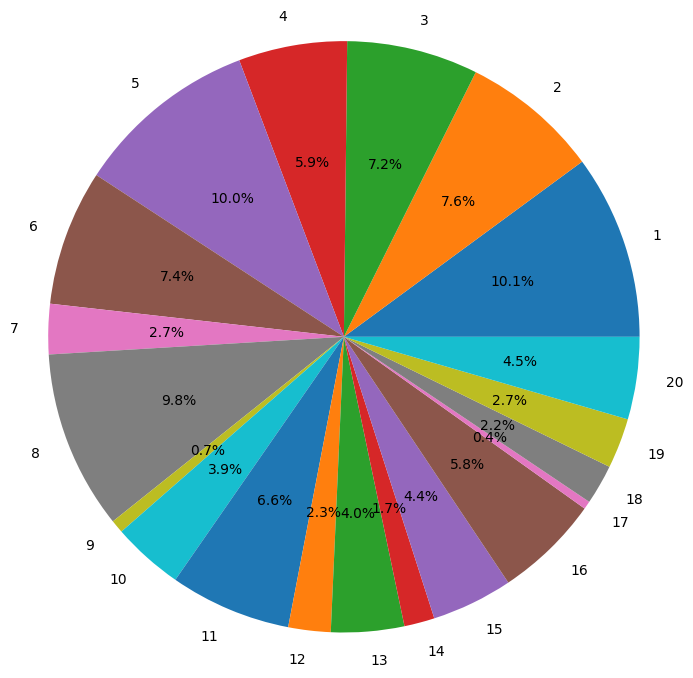

In [140]:
label = unmarried['Product_Category'].value_counts(normalize=True).sort_index().reset_index()['Product_Category']
products_unmarried = unmarried['Product_Category'].value_counts(normalize=True).sort_index()
plt.pie(products_unmarried,labels =label, autopct='%1.1f%%', radius=2);

어느 정도 구매패턴이 비슷한 것을 볼 수 있다. 

### top5 판매 카테고리
- married : 1,2,5,6,8
- unmarried : 1,2,5,6,8

### 가설 검정
- 두 그룹의 구매 패턴 차이는 존재하지 않고, 미혼이 더 많은 물품을 구매했다.

### 결론
- 18-45의 구매는 결혼 여부 상관없이 비슷한 품목을 구매하는 것으로 나타남
- top5 품목은 1,2,5,6,8 카테고리임을 확인할 수 있었다. 이에 해당하는 제품들에 대해 더 많은 발주를 넣도록 하자.